In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os 
os.getcwd()

'/content'

In [4]:
os.chdir("/content/drive/MyDrive/Sir")
os.getcwd()

'/content/drive/MyDrive/Sir'

** model creation **

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sh
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [123]:
data=pd.read_excel("/content/drive/MyDrive/Sir/1635238036200_TSDATA.xlsx",skiprows=(1,2),header=[1])

In [124]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Exp. Run,TTA,RPM,TRS,TF,TS
0,NaN,NaN,NaN,NaN,1,1,900,50,SS,184.2
1,NaN,NaN,NaN,NaN,2,1,900,100,SO,170.1
2,NaN,NaN,NaN,NaN,3,1,900,150,ST,184.2
3,NaN,NaN,NaN,NaN,4,1,1200,50,SO,181.5
4,NaN,NaN,NaN,NaN,5,1,1200,100,ST,180.1


In [125]:
data.drop(columns=["Unnamed: 0","Unnamed: 1","Unnamed: 2","Unnamed: 3","Exp. Run"],inplace=True)

In [126]:
|data.head()

SyntaxError: ignored

In [ ]:
data.shape

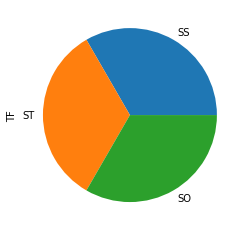

In [127]:
data["TF"].value_counts().plot(kind="pie")    #cheacking the balancing of data. here our data is balanced 

In [128]:
data["TF"]=data["TF"].replace(["SS","SO","ST"],[1,2,3])    # converting the text data to numerical data on the given reference ss->1,so->2,st->3

In [129]:
data.head()

,TTA,RPM,TRS,TF,TS
0,1,900,50,1,184.2
1,1,900,100,2,170.1
2,1,900,150,3,184.2
3,1,1200,50,2,181.5
4,1,1200,100,3,180.1


,TTA,RPM,TRS,TF,TS
TTA,1.00000,0.0000,0.000000,0.000000,0.555160
RPM,0.00000,1.0000,0.000000,0.000000,-0.237200
TRS,0.00000,0.0000,1.000000,0.000000,-0.133406
TF,0.00000,0.0000,0.000000,1.000000,0.132808
TS,0.55516,-0.2372,-0.133406,0.132808,1.000000


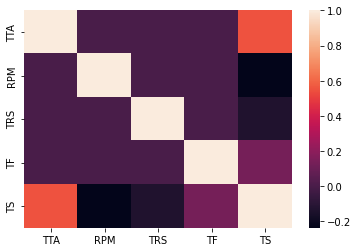

In [130]:
sh.heatmap(data.corr()) # checking the relation between each columns using heatmap
data.corr()

In [131]:
# there is no case of co-linearity

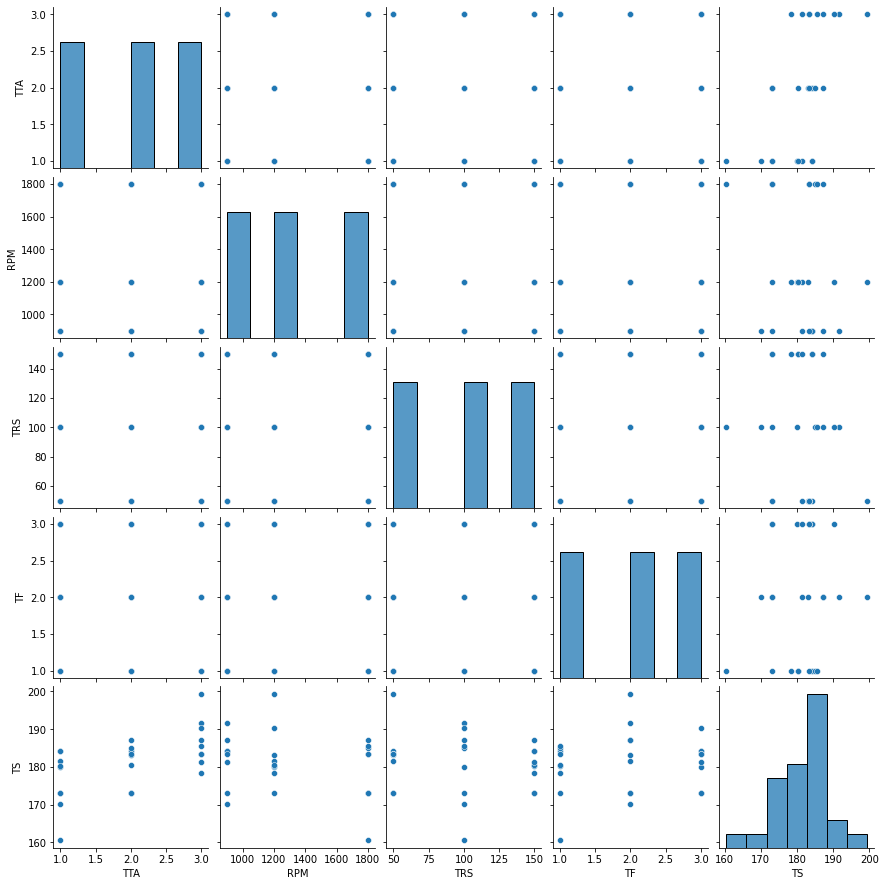

In [132]:
sh.pairplot(data)  # pairplot to analyse the complete data together

In [133]:
data.head()

,TTA,RPM,TRS,TF,TS
0,1,900,50,1,184.2
1,1,900,100,2,170.1
2,1,900,150,3,184.2
3,1,1200,50,2,181.5
4,1,1200,100,3,180.1


In [134]:

data.isnull().sum()  # checking the number of empty.

TTA    0
RPM    0
TRS    0
TF     0
TS     0
dtype: int64

In [135]:
#===================== ignore it ==========================================#
#from sklearn.preprocessing import MinMaxScaler
#s2=MinMaxScaler()
#data["RPM"]=s2.fit_transform(np.array(data["RPM"]).reshape(-1,1))
#data["TRS"]=s2.fit_transform(np.array(data["TRS"]).reshape(-1,1))


In [136]:
sc1=StandardScaler()                                     #scaling the data using the standard scaler
sc2=StandardScaler()
sc3=StandardScaler()
data["RPM"]=sc1.fit_transform(np.array(data["RPM"]).reshape(-1,1))
data["TRS"]=sc2.fit_transform(np.array(data["TRS"]).reshape(-1,1))

data["TS"]=sc3.fit_transform(np.array(data["TS"]).reshape(-1,1))

In [137]:
data.head()

,TTA,RPM,TRS,TF,TS
0,1,-1.069045,-1.224745,1,0.406395
1,1,-1.069045,0.000000,2,-1.453154
2,1,-1.069045,1.224745,3,0.406395
3,1,-0.267261,-1.224745,2,0.050311
4,1,-0.267261,0.000000,3,-0.134325


In [138]:
data.info()           # taking the information of the scaled dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TTA     27 non-null     int64  
 1   RPM     27 non-null     float64
 2   TRS     27 non-null     float64
 3   TF      27 non-null     int64  
 4   TS      27 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.2 KB


In [139]:
round(data.describe())     # Statical analysis

,TTA,RPM,TRS,TF,TS
count,27.0,27.0,27.0,27.0,27.0
mean,2.0,0.0,0.0,2.0,-0.0
std,1.0,1.0,1.0,1.0,1.0
min,1.0,-1.0,-1.0,1.0,-3.0
25%,1.0,-1.0,-1.0,1.0,-1.0
50%,2.0,-0.0,0.0,2.0,0.0
75%,3.0,1.0,1.0,3.0,0.0
max,3.0,1.0,1.0,3.0,2.0


In [140]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

**Creating linear model on the given dataset using Linear regression**

In [141]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [142]:
m1=LinearRegression()     # creating the object of linear regression and fitting the data
m1.fit(x,y)

LinearRegression()

In [143]:
p1=m1.predict(x)        # prediction on traing dataset

In [144]:
from sklearn.metrics import accuracy_score,classification_report,r2_score,mean_squared_error

In [145]:
r2_score(y,p1)  # calculating the r2 score of linear regression

0.3999017356959489

In [146]:
mean_squared_error(y,p1)  # calculating the mean_square error 

0.600098264304051

**creating the k nearest neighabours Regressor**

In [147]:
from sklearn.neighbors import KNeighborsRegressor
m2=KNeighborsRegressor()     # creating the object of k neghabour regressior
m2.fit(x,y)

KNeighborsRegressor()

In [148]:
p2=m2.predict(x)    # predicting  on training dataset using k neghabour regressor

In [149]:
r2_score(y,p2)  # r2 score of kneghabour regressor

0.3221318152753787

In [150]:
mean_squared_error(y,p2)   # mean square error of k neghabour regressor .

0.6778681847246212

**Creating ANN model of neural network**

In [151]:
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [152]:
m3=Sequential()
m3.add(Dense(4,activation="relu",input_dim=x.shape[1]))
m3.add(Dense(20,activation="relu"))
m3.add(Dense(20,activation="relu"))
m3.add(Dense(20,activation="relu"))
m3.add(Dense(10,activation="relu"))
m3.add(Dense(1,activation="linear"))

In [153]:
m3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 20)                100       
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dense_15 (Dense)            (None, 20)                420       
                                                                 
 dense_16 (Dense)            (None, 10)                210       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,181
Trainable params: 1,181
Non-traina

In [154]:
m3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss="mean_squared_error",metrics=["mean_squared_logarithmic_error"])

In [155]:
history=m3.fit(x,y,verbose=1,epochs=953,validation_batch_size=0.2)

Epoch 1/953
1/1 [==============================] - 0s 423ms/step - loss: 1.0215 - mean_squared_logarithmic_error: 0.1119
Epoch 2/953
1/1 [==============================] - 0s 5ms/step - loss: 1.0134 - mean_squared_logarithmic_error: 0.1145
Epoch 3/953
1/1 [==============================] - 0s 5ms/step - loss: 1.0049 - mean_squared_logarithmic_error: 0.1172
Epoch 4/953
1/1 [==============================] - 0s 5ms/step - loss: 0.9986 - mean_squared_logarithmic_error: 0.1217
Epoch 5/953
1/1 [==============================] - 0s 8ms/step - loss: 0.9947 - mean_squared_logarithmic_error: 0.1239
Epoch 6/953
1/1 [==============================] - 0s 8ms/step - loss: 0.9913 - mean_squared_logarithmic_error: 0.1254
Epoch 7/953
1/1 [==============================] - 0s 6ms/step - loss: 0.9880 - mean_squared_logarithmic_error: 0.1267
Epoch 8/953
1/1 [==============================] - 0s 6ms/step - loss: 0.9838 - mean_squared_logarithmic_error: 0.1283
Epoch 9/953
1/1 [=============================

Text(0, 0.5, 'loss')

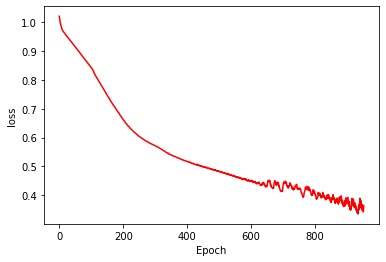

In [156]:
plt.plot(history.history["loss"],color="r")
plt.xlabel("Epoch")
plt.ylabel("loss")

Text(0, 0.5, 'mean_squared_logarithmic_error')

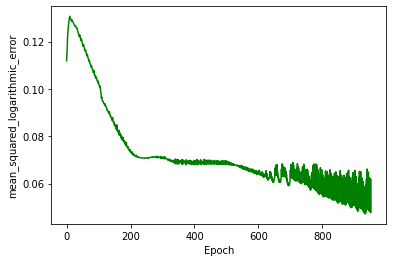

In [157]:
plt.plot(history.history["mean_squared_logarithmic_error"],color="g")
plt.xlabel("Epoch")
plt.ylabel("mean_squared_logarithmic_error")

In [158]:
p3=m3.predict(x)
r2_score(y,p3)   # r2 score 

0.6491179520539878

In [159]:
mean_squared_error(y,p3)  #mean square error

0.3508820479460122

** Ridge regression **

In [160]:
from sklearn.linear_model import Ridge

In [161]:
m4=Ridge(alpha=0.2,random_state=3)
m4.fit(x,y)

Ridge(alpha=0.2, random_state=3)

In [162]:
p4=m4.predict(x)
r2_score(y,p4)      #r2 score 

0.39985838355181036

In [163]:
mean_squared_error(y,p4)     # mean square error 

0.6001416164481895

**lasso **

In [164]:
from sklearn.linear_model import Lasso

In [165]:
m5=Lasso(random_state=32)
m5.fit(x,y)

Lasso(random_state=32)

In [166]:
p5=m5.predict(x)
r2_score(y,p5)

0.0

In [167]:
mean_squared_error(y,p5)

0.9999999999999999

In [168]:
#=============================== Linear Model ========================================#

# r2_score  : 0.3999017356959488
# mean square error : 0.6000982643040511

#================================ Kneghabourregressor Model ===========================#

# r2_score  : 0.3221318152753787
# mean square error : 0.6778681847246212

#================================= ANN Model ===========================================#

# r2_score  : 0.9914550391443779
# mean square error : 0.008544960855622006

#================================== Ridge Model =========================================#

# r2_score  : 0.39985838355181025
# mean square error : 0.6001416164481896

#=================================== Lasso Model =========================================#

# r2_score  : 0.0
# mean square error : 0.9999999999999999

#-----------------------------------------------------------------------------------------#

# ****** the best model is ANN ****************#

In [169]:
data.head()

,TTA,RPM,TRS,TF,TS
0,1,-1.069045,-1.224745,1,0.406395
1,1,-1.069045,0.000000,2,-1.453154
2,1,-1.069045,1.224745,3,0.406395
3,1,-0.267261,-1.224745,2,0.050311
4,1,-0.267261,0.000000,3,-0.134325


**Predict here **

In [182]:
TTA=1                                 # write your data TTA,RPM,TRS,TF and predict here
RPM=1200
TRS=100
Tf=3

#-----------------------------------------------------------------------------------------------------------#

RPM=float(sc1.transform(np.array([RPM]).reshape(1,-1)))
TRS=float(sc2.transform(np.array([TRS]).reshape(1,-1)))
l=[TTA,RPM,TRS,TF]
ar=np.array(l)
print(sc3.inverse_transform(m3.predict(ar.reshape(1,-1))))

[[179.82712]]
